In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.display import display, HTML
display(HTML('<h2><left>SOFTWARE PARA AUXÍLIO AO PROJETO DE MECANISMOS DE 4 BARRAS</center></h2>'))

In [3]:
display(HTML('<h5><left>Autor: Yvan Pereira de Oliveira</center></h5>'))

In [4]:
# 4.1  EQUACIONAMENTO DINÂMICO

In [5]:
#Abordagem vetorial e com números complexos:

In [6]:
## 4.1.1 CINEMÁTICA

In [7]:
### 4.1.1.1 	Solução Analítica para Análise de Posição

In [8]:
#Começamos importando as bibliotecas que serão utilizadas no desenvolvimento do programa.

In [9]:
import sympy as sy
import sympy.physics.mechanics as ps
from sympy import *
import numpy as ny

In [10]:
#Declaramos as variáveis simbólicas:

In [11]:
a,b,c,d = symbols('a b c d')
theta2 = symbols('theta2')

In [12]:
#As projeções dos elos nos eixos x e y são:

In [13]:
Ax = a*sy.cos(theta2)
#Ax = symbols('A_x')
#Eq(Ax,a*sy.cos(theta2))
#Ax

In [14]:
Ay = a*sy.sin(theta2)
#Ay = symbols('A_y')
#Eq(Ay,a*sy.sin(theta2))
#Ay

In [15]:
#Escrevendo as equações dos círculos deslocados, com centro A e O_4, como demonstrado na análise gráfica, tem-se:
#b2 e c2 são os raios dos círculos

In [16]:
Bx, By = symbols('B_x B_y')

In [17]:
b2 = (Bx - Ax)**2 + (By - Ay)**2
Eq1 = Eq(b**2,b2)
Eq1 = b2 - b**2
#Eq1 = equação do primeiro círculo deslocado

In [18]:
#Eq1.expand()

In [19]:
c2 = (Bx - d)**2 + (By)**2
Eq2 = Eq(c**2, c2)
Eq2 = c2 - c**2
#Eq2 = equação do segundo círculo deslocado

In [20]:
Eq3 = Eq1 - Eq2
#sy.expand(Eq3)

In [21]:
sol_Bx = sy.solve(Eq3,Bx)[0]
#Eq(Bx,sol_Bx)

In [22]:
Eq4 = Eq2.subs(Bx,sol_Bx)
#Eq(Bx,Eq4)

In [23]:
#Para B_y, por se tratar de uma equação de segundo grau, há duas soluções possíveis.

In [24]:
sol_By = sy.solve(Eq4,By)
#sol_By

In [25]:
By1 = sol_By[0]
#By1 = symbols('B_y1')
#Eq(By1,sol_By[0])

In [26]:
By2 = sol_By[1]
#By2 = symbols('B_y2')
#Eq(By2,sol_By[1])

In [27]:
#Agora, resolvendo B_x para as duas soluções de B_y encontradas:

In [28]:
Bx1 = sol_Bx.subs(By,By1)
#Bx1 = symbols('B_x1')
#Eq(Bx1,sol_Bx.subs(By,By1))

In [29]:
Bx2 = sol_Bx.subs(By,By2)
#Bx2 = symbols('B_x2')
#Eq(Bx2,sol_Bx.subs(By,By2))

In [30]:
dic1 = {a:10,b:20,c:10,d:20,theta2:sy.pi/4}

Coornedadas do eixo x nos pontos $O_2$, $A$, $B$ e $O_4$, respectivamente:

In [31]:
#Coornedadas do eixo x nos pontos O_2, A, B e O_4:
X = [0,Ax.subs(dic1).evalf(),Bx1.subs(dic1).evalf(),d.subs(dic1).evalf()]
X

[0, 7.07106781186548, 27.0710678118655, 20.0000000000000]

Coornedadas do eixo y nos pontos $O_2$, $A$, $B$ e $O_4$, respectivamente:

In [32]:
#Coornedadas do eixo y nos pontos O_2, A, B e O_4:
Y = [0,Ay.subs(dic1).evalf(),By1.subs(dic1).evalf(),0]
Y

[0, 7.07106781186548, 7.07106781186548, 0]

In [33]:
#import matplotlib.pyplot as plt
#plt.figure()
#plt.plot(X,Y,'-o')
#plt.title('Plotagem do mecanismo de 4 barras')
#plt.show()

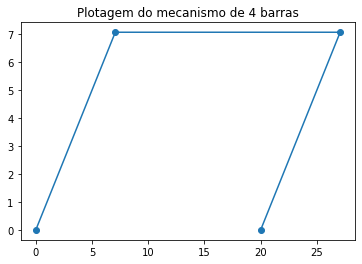

Mecanismo Grashof


In [110]:
elo_maior = dic1[max(dic1, key=dic1.get)]
#elo_maior = dic1[max(dic1, key=dic1.get('a','b','c','d'))]
elo_menor = dic1[min(dic1, key=dic1.get)]
soma_elos = dic1[a]+dic1[b]+dic1[c]+dic1[d]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(X,Y,'-o')
plt.title('Plotagem do mecanismo de 4 barras')
#plt.xlim([-10,30])
#plt.ylim([-10,20])
plt.grid(False)
plt.gca().set_aspect('auto', adjustable='box', anchor='SW')
plt.show()
if (elo_maior+elo_menor)<(soma_elos-(elo_maior+elo_menor)):
    print('Mecanismo Grashof')
else:
    print('Mecanismo Não-Grashof')

In [35]:
### 4.1.1.1 	Solução Analítica para Análise de Velocidade

In [36]:
#Foi descoberto anteriormente na análise de posição os valores de $θ_2$, $θ_3$ e $θ_4$, assim como o $w_2$. Se sabe também os comprimentos dos elos $R_1$, $R_2$, $R_3$ e $R_4$.

In [37]:
#Para descobrirmos então os valores de $w_3$ e $w_4$, assim também como as velocidades das juntas, serão realizados os procedimentos abaixo como segue.

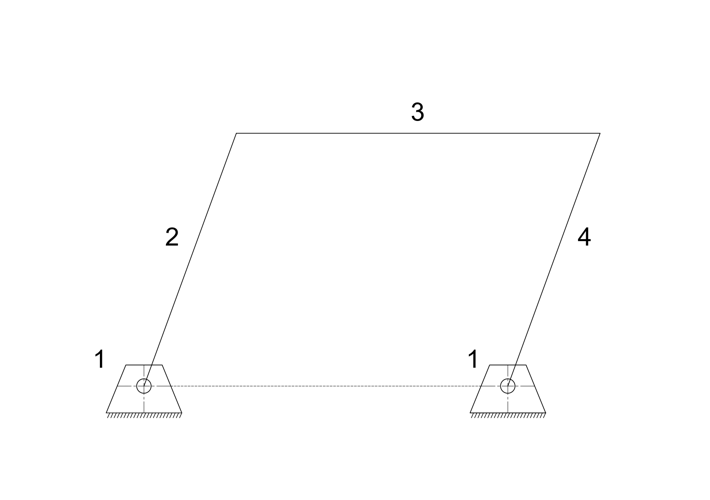

In [38]:
from PIL import Image

img = Image.open('img.jpg')
width = 710
height = 500
img_resized = img.resize((width, height))
img_resized
#img_resized.save('img_redimensionada.png')

In [39]:
#Desenhando e analisando a malha fechada do nosso mecanismo, concluímos que:

In [40]:
#$R_2 + R_3 - R_4 - R_1 = 0$

In [41]:
#Sendo esta a equação vetorial da nossa malha fechada.

In [42]:
#Iremos então converter os vetores dos comprimentos dos elos para a forma de números complexos, representado-os com a, b, c, d, sendo estes valores escalares.

In [43]:
#Declaramos as variáveis simbólicas:

In [44]:
a,b,c,d,t,theta1 = symbols('a b c d t theta1')

In [45]:
#Declaramos as seguintes variáveis em função do tempo:

In [46]:
theta2 = Function('theta2')(t)
theta3 = Function('theta3')(t)
theta4 = Function('theta4')(t)

In [47]:
#V_A,V_BA,V_B = symbols('V_A V_BA V_B')

In [48]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [49]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [50]:
from IPython.display import display
def f(a, b, c, d):
    display()
    #return a+b+c+d

In [51]:
elos = interactive(f, a=1000, b=1000, c=1000, d=1000)

In [52]:
#elos.children

In [53]:
display(elos)

interactive(children=(IntSlider(value=1000, description='a', max=3000, min=-1000), IntSlider(value=1000, descr…

In [54]:
#def CondGrashof(S,L,P,Q):
#  if (S+L)<(P+Q):
#    return print('Mecanismo Classe I')
#  elif (S+L)>(P+Q):
#   return print('Mecanismo Classe II')
#  else:
#    return print('Mecanismo Classe III')

In [55]:
#a = float(input('a = '))

In [56]:
#b = float(input('b = '))

In [57]:
#c = float(input('c = '))

In [58]:
#d = float(input('d = '))

In [59]:
#Para comodidade usual da linguagem, já que a biblioteca sympy utiliza as seguintes notações de forma maisúscula, fazemos:

In [60]:
e = E
i = I

In [61]:
#A partir da nossa equação vetorial da malha fechada, obtemos a mesma equação, só que em forma de números complexos:

In [62]:
eq1 = a*e**(i*theta2) + b*e**(i*theta3) - c*e**(i*theta4) - d*e**(i*theta1)
#eq1

In [63]:
#Em primeiro lugar queremos encontrar $ω_3$ e $ω_4$, então derivamos então a equação 1 em relação ao tempo.

In [64]:
eq2 = eq1.diff(t)
#eq2

In [65]:
#Agora substituímos as derivadas de $θ_2$, $θ_3$ e $θ_4$ no tempo por $w_2$, $w_3$ e $w_4$, respectivamente.

In [66]:
omega2,omega3,omega4 = symbols('omega2 omega3 omega4')

In [67]:
dict_omegas = {theta2.diff(t):omega2,theta3.diff(t):omega3,theta4.diff(t):omega4}
#dict_omegas

In [68]:
#Substituindo os valores desse dicionário na equação 2, obtemos:

In [69]:
eq2 = eq2.subs(dict_omegas)
#eq2

In [70]:
#Temos definido então que:\
#\
#$V_A = iaω_2eiθ_2$\
#$V_BA = ibω_3eiθ_3$\
#$V_B = icω_4eiθ_4$

In [71]:
#Definimos então estas variáveis:

In [72]:
V_A = i*a*omega2*e**(i*theta2)
V_BA = i*b*omega3*e**(i*theta3)
V_B = i*c*omega4*e**(i*theta4)

In [73]:
#Declaramos a identidade de Euler atráves de um dicionário para posterior substituição.

In [74]:
id_euler = {e**(i*theta2): cos(theta2) + i*sin(theta2),
            e**(i*theta3): cos(theta3) + i*sin(theta3),
            e**(i*theta4): cos(theta4) + i*sin(theta4)}

In [75]:
#A equação 3 será o resultado da substituição da identidade de Euler na equação 2.

In [76]:
eq3 = eq2.subs(id_euler)
#eq3

In [77]:
#Expandimos a equação 3:

In [78]:
eq3 = eq3.expand()
#eq3

In [79]:
#Agora, separamos a parte real presente na equação 3, substituindo os valores imaginários por zero.

In [80]:
eq3_real = eq3.subs(i,0)
#eq3_real

In [81]:
#E separamos a parte imaginária presente na equação 3, subtraindo da equação 3 a parte real presente, restando então a parte imaginária, sendo esta substituída por $i = 1$.

In [82]:
eq3_im = (eq3 - eq3_real).subs(i,1)
#eq3_im

In [83]:
#Calculamos então a solução para os valores de $w_3$ e $w_4$, a partir da equação real e imaginária obtidas anteriormente.

In [84]:
sol_omegas = solve([eq3_im,eq3_real],omega3,omega4)
#sol_omegas

#### Velocidades lineares:

In [85]:
#Substituindo as soluções de $w_3$ e $w_4$ nas equações de velocidade $V_A$, $V_BA$ e $V_B$, obtemos as velocidades lineares do nosso mecanismo.

In [86]:
#V_A,V_BA,V_B = symbols('V_A V_BA V_B')

In [87]:
Eq(V_A,V_A.subs(sol_omegas))

True

In [88]:
V_A.subs(sol_omegas)

I*a*omega2*exp(I*theta2(t))

In [89]:
Eq(V_BA,V_BA.subs(sol_omegas))

Eq(I*b*omega3*exp(I*theta3(t)), I*b*(a*omega2*sin(theta2(t))*cos(theta4(t))/(-b*sin(theta3(t))*cos(theta4(t)) + b*sin(theta4(t))*cos(theta3(t))) - a*omega2*sin(theta4(t))*cos(theta2(t))/(-b*sin(theta3(t))*cos(theta4(t)) + b*sin(theta4(t))*cos(theta3(t))))*exp(I*theta3(t)))

In [90]:
Eq(V_B,V_B.subs(sol_omegas))

Eq(I*c*omega4*exp(I*theta4(t)), I*c*(a*omega2*sin(theta2(t))*cos(theta3(t))/(-c*sin(theta3(t))*cos(theta4(t)) + c*sin(theta4(t))*cos(theta3(t))) - a*omega2*sin(theta3(t))*cos(theta2(t))/(-c*sin(theta3(t))*cos(theta4(t)) + c*sin(theta4(t))*cos(theta3(t))))*exp(I*theta4(t)))

#### Velocidades angulares:

In [91]:
#Isolamos então a soluções de $w_3$ e $w_4$ em função de $w_2$, obtendo assim, as velocidades angulares do nosso mecanismo.

In [92]:
Eq(omega3,sol_omegas[omega3])

Eq(omega3, a*omega2*sin(theta2(t))*cos(theta4(t))/(-b*sin(theta3(t))*cos(theta4(t)) + b*sin(theta4(t))*cos(theta3(t))) - a*omega2*sin(theta4(t))*cos(theta2(t))/(-b*sin(theta3(t))*cos(theta4(t)) + b*sin(theta4(t))*cos(theta3(t))))

In [93]:
Eq(omega4,sol_omegas[omega4])

Eq(omega4, a*omega2*sin(theta2(t))*cos(theta3(t))/(-c*sin(theta3(t))*cos(theta4(t)) + c*sin(theta4(t))*cos(theta3(t))) - a*omega2*sin(theta3(t))*cos(theta2(t))/(-c*sin(theta3(t))*cos(theta4(t)) + c*sin(theta4(t))*cos(theta3(t))))

In [94]:
#Definindo as soluções de $θ_3$ e $θ_4$, obtemos:

#### Os ângulos:

In [95]:
sol_theta3 = -2*atan((2*a*b*sin(theta2) - sqrt(-a**4 + 4*a**3*d*cos(theta2) + 4*a**2*b**2*sin(theta2)**2 +
4*a**2*b**2*cos(theta2)**2 - 2*a**2*b**2 + 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 
4*a*b**2*d*cos(theta2) - 4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 
2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 - 2*a*b*cos(theta2) - 2*a*d*cos(theta2) + b**2 + 2*b*d - c**2 + d**2))
Eq(theta3,sol_theta3)


Eq(theta3(t), -2*atan((2*a*b*sin(theta2(t)) - sqrt(-a**4 + 4*a**3*d*cos(theta2(t)) + 4*a**2*b**2*sin(theta2(t))**2 + 4*a**2*b**2*cos(theta2(t))**2 - 2*a**2*b**2 + 2*a**2*c**2 - 4*a**2*d**2*cos(theta2(t))**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2(t)) - 4*a*c**2*d*cos(theta2(t)) + 4*a*d**3*cos(theta2(t)) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 - 2*a*b*cos(theta2(t)) - 2*a*d*cos(theta2(t)) + b**2 + 2*b*d - c**2 + d**2)))

In [96]:
sol_theta4 = 2*atan((2*a*c*sin(theta2) - sqrt(-a**4 + 4*a**3*d*cos(theta2) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2)**2 +
4*a**2*c**2*cos(theta2)**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2)**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2) - 
4*a*c**2*d*cos(theta2) + 4*a*d**3*cos(theta2) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2) - 
2*a*d*cos(theta2) - b**2 + c**2 - 2*c*d + d**2))
Eq(theta4,sol_theta4)

Eq(theta4(t), 2*atan((2*a*c*sin(theta2(t)) - sqrt(-a**4 + 4*a**3*d*cos(theta2(t)) + 2*a**2*b**2 + 4*a**2*c**2*sin(theta2(t))**2 + 4*a**2*c**2*cos(theta2(t))**2 - 2*a**2*c**2 - 4*a**2*d**2*cos(theta2(t))**2 - 2*a**2*d**2 - 4*a*b**2*d*cos(theta2(t)) - 4*a*c**2*d*cos(theta2(t)) + 4*a*d**3*cos(theta2(t)) - b**4 + 2*b**2*c**2 + 2*b**2*d**2 - c**4 + 2*c**2*d**2 - d**4))/(a**2 + 2*a*c*cos(theta2(t)) - 2*a*d*cos(theta2(t)) - b**2 + c**2 - 2*c*d + d**2)))

In [97]:
elos = {a: 300, b: 500, c: 300, d: 500}

In [98]:
#pip install voila

In [99]:
#pip show voila

In [100]:
# Imports for JupyterLite
try:
    import piplite
    await piplite.install(['ipywidgets'])
except ImportError:
    pass

In [101]:
from ipywidgets import widgets
widgets.FloatText(
    value=0.0,
    description='Elo 1:',
    disabled=False)

FloatText(value=0.0, description='Elo 1:')

In [102]:
widgets.Button(
description='Ok',
button_style='success',
icon='check',
tooltip='')

Button(button_style='success', description='Ok', icon='check', style=ButtonStyle())